Data preparation 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('D:\DataSet.csv')
df = pd.DataFrame(data)

# Check for missing values
missing_values = data.isnull().sum()
# Get the total number of NULL values in each column
total_nulls = df.isnull().sum()
print(total_nulls)

# Handle missing values (e.g., dropping or imputing)
data = data.dropna()  # Or use imputation methods


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Converting categorical data to numeric and Identify Outliers

customerID             0
gender                 0
SeniorCitizen       1142
Partner                0
Dependents             0
tenure                 0
PhoneService         682
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64


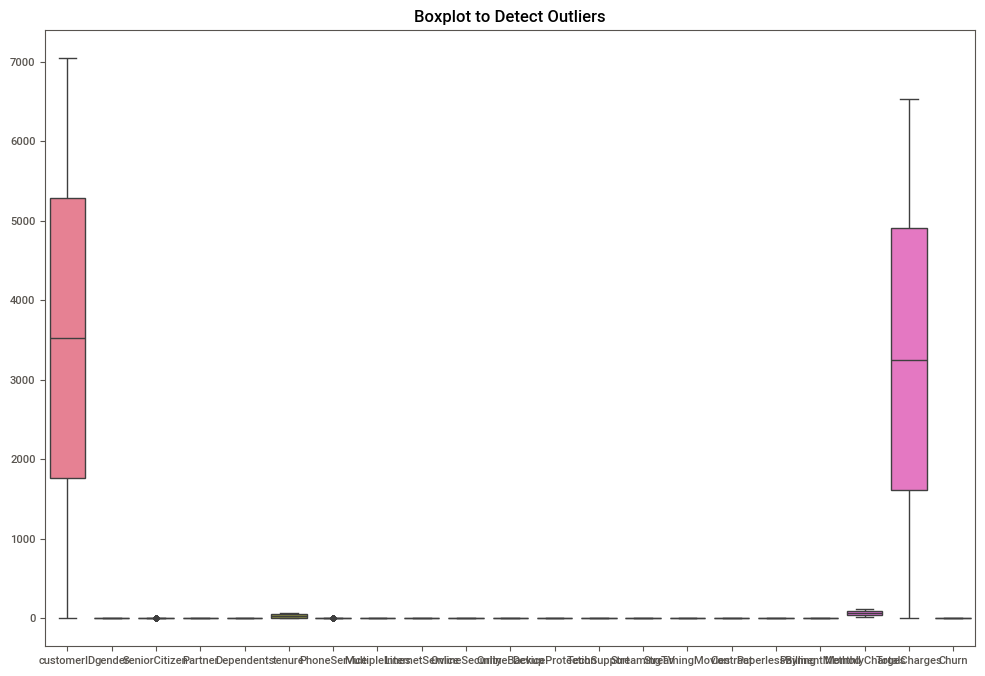

In [ ]:
# Converting categorical data to numeric
from sklearn.preprocessing import LabelEncoder

for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

# Identify outliers
# Here, using IQR method for simplicity
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print(outliers)

# Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.title("Boxplot to Detect Outliers")
plt.show()

In [4]:
# Listing Data Types (Numeric, categorical, text)
data_types = data.dtypes
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(include=['object'])

             Feature  Importance
5             tenure    0.152112
18    MonthlyCharges    0.144195
19      TotalCharges    0.134525
0         customerID    0.129828
15          Contract    0.083835
17     PaymentMethod    0.043607
12       TechSupport    0.041829
9     OnlineSecurity    0.041549
10      OnlineBackup    0.026640
8    InternetService    0.026560
16  PaperlessBilling    0.023181
1             gender    0.022940
11  DeviceProtection    0.021210
7      MultipleLines    0.020086
3            Partner    0.019330
2      SeniorCitizen    0.017063
4         Dependents    0.016474
14   StreamingMovies    0.015062
13       StreamingTV    0.014929
6       PhoneService    0.005045


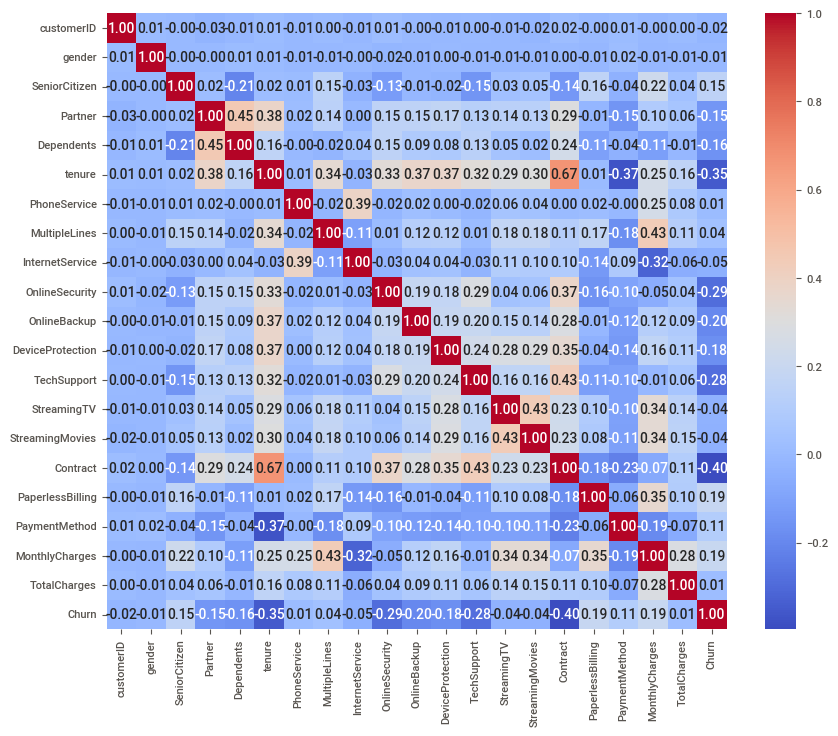

In [13]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance using RandomForest
from sklearn.ensemble import RandomForestClassifier

X = data.drop(['Churn'], axis=1)
y = data['Churn']
model = RandomForestClassifier()
model.fit(X, y)

# Display feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Correlation matrix for numeric data
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [6]:
# Train-Test Split
from sklearn.model_selection import train_test_split
import sweetviz as sv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SweetViz analysis
train_data = X_train.copy()
train_data['Churn'] = y_train
test_data = X_test.copy()
test_data['Churn'] = y_test

report = sv.compare([train_data, "Train Data"], [test_data, "Test Data"], target_feat='Churn')
report.show_html('SweetViz_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report SweetViz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Model Evaluation Metrics:
                      Accuracy  Precision    Recall  F1 Score
Naive Bayes          0.810628   0.797285  0.839847  0.818013
Logistic Regression  0.827053   0.806023  0.867493  0.835629
Random Forest        0.855556   0.855787  0.859867  0.857822
XGBoost              0.846377   0.855199  0.838894  0.846968


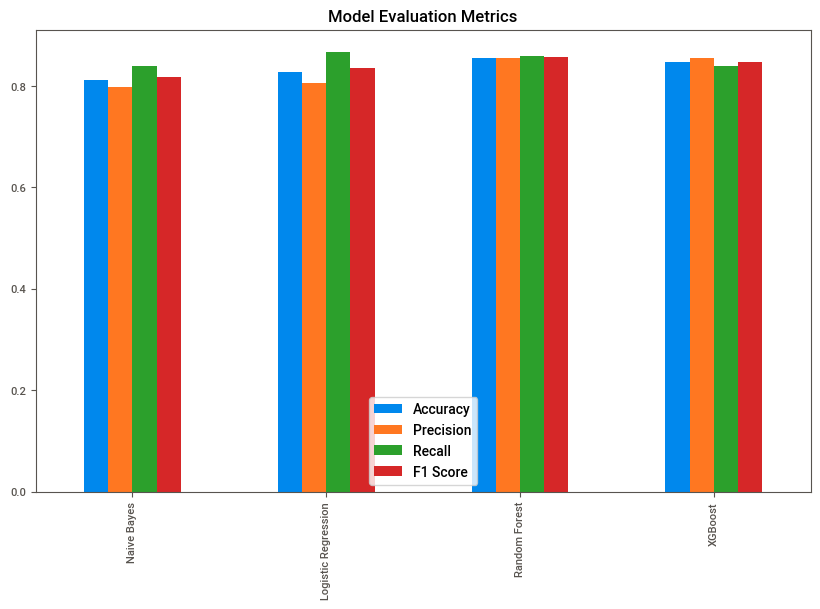

In [12]:
# Model Building and Evaluation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model initialization
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=200, tol=1e-3),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and Evaluate Each Model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    
    # Data Imbalance with SMOTE
from imblearn.over_sampling import SMOTE

# Handle Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Display SMOTE Results
results_df = pd.DataFrame(results).T
print("Model Evaluation Metrics:\n", results_df)

# Visualize Results
results_df.plot(kind='bar', figsize=(10, 6), title="Model Evaluation Metrics")
plt.show()
